---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

In [416]:
# Import necessary packages
import  pandas  as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load dataset
df = pd.read_csv("../../data/processed-data/ces_clean.csv")
print(df.columns)
print(df.shape)

Index(['id', 'total_expense', 'online_expense', 'online_percentage',
       'bought_online', 'total_income', 'age', 'earning_type',
       'highest_ed_completed', 'marital_status', 'race', 'is_asian',
       'is_black', 'race_unknown', 'is_native_american', 'is_other_race',
       'is_pacific_islander', 'is_white', 'sex', 'full_time_1_yr',
       'part_time_1_yr', 'full_time_part_yr', 'part_time_part_yr',
       'no_school_completed', 'grades_1-8_completed', 'high_school_no_degree',
       'high_school_grad', 'some_college_no_degree', 'associates_degree',
       'bachelors_degree', 'graduate_degree', 'is_married', 'is_widowed',
       'is_divorced', 'is_separated', 'is_single', 'is_female', 'is_male'],
      dtype='object')
(39257, 38)


From above, our dataset has a little over 39,000 rows and 38 columns. Let's view the data types of the columns. A lot of the columns are the result of one-hot encoded. As shown below, most of the columns are strings or numerical types such as int or float.

In [358]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39257 entries, 0 to 39256
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39257 non-null  int64  
 1   total_expense           39257 non-null  float64
 2   online_expense          39257 non-null  float64
 3   online_percentage       39257 non-null  float64
 4   bought_online           39257 non-null  int64  
 5   total_income            39257 non-null  float64
 6   age                     39257 non-null  int64  
 7   earning_type            20630 non-null  object 
 8   highest_ed_completed    33279 non-null  object 
 9   marital_status          39257 non-null  object 
 10  race                    39257 non-null  object 
 11  is_asian                39257 non-null  float64
 12  is_black                39257 non-null  float64
 13  race_unknown            39257 non-null  float64
 14  is_native_american      39257 non-null

We can see the number summaries of the numerical columns below. Notice how the mean total income is much higher than the 2023 US annual salary of $ 65,470 given by the [Bureau of Labor Statistics](https://www.bls.gov/oes/current/oes_nat.htm). This makes sense as the mean age of survey participants is 42 years old. This should be the approximate age where we expect individuals to make the largest salaries of their lives.

In [359]:
df_with_numerical_col = df[['total_expense', 'online_expense', 'online_percentage', 'total_income', 'age']]
print(df_with_numerical_col.describe())

       total_expense  online_expense  online_percentage   total_income  \
count   3.925700e+04    39257.000000       39257.000000   39257.000000   
mean    1.057498e+05      109.655603           0.083691  120687.713624   
std     1.181791e+05     3076.579225           1.467043   72377.446284   
min     3.000000e+01        0.000000           0.000000       1.249500   
25%     2.066600e+04        0.000000           0.000000   64645.000500   
50%     8.302200e+04        0.000000           0.000000  109047.501000   
75%     1.445210e+05        0.000000           0.000000  166230.000000   
max     2.077078e+06   156872.000000          83.422683  326216.959500   

                age  
count  39257.000000  
mean      42.016252  
std       23.930069  
min        0.000000  
25%       22.000000  
50%       42.000000  
75%       62.000000  
max       87.000000  


## Univariate Analysis 


The histogram of annual income shows us the dataset is skewed right since the majority of the data points are roughly between $50,0000 and $100,000.

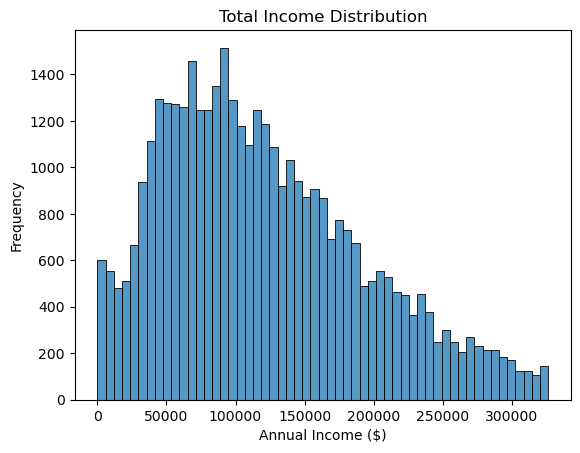

In [360]:
sns.histplot(data=df, x="total_income")

plt.title("Total Income Distribution")
plt.xlabel("Annual Income ($)")
plt.ylabel("Frequency")
plt.show()

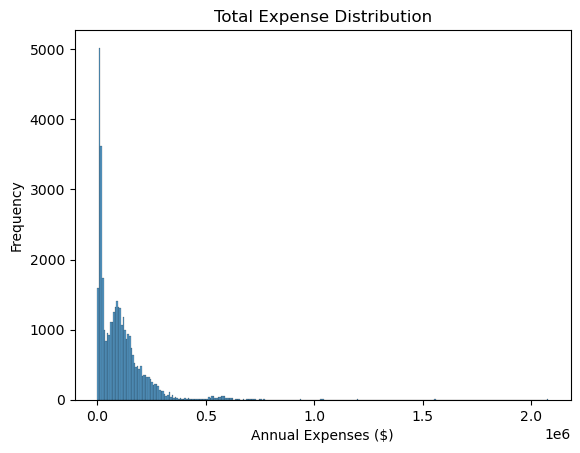

In [361]:
sns.histplot(data=df, x="total_expense")
plt.title("Total Expense Distribution")
plt.xlabel("Annual Expenses ($)")
plt.ylabel("Frequency")

plt.show()

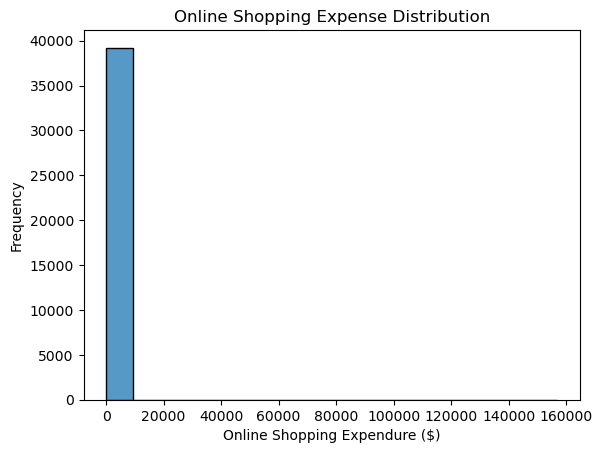

In [389]:
sns.histplot(data=df, x="online_expense")

plt.title("Online Shopping Expense Distribution")
plt.xlabel("Online Shopping Expendure ($)")
plt.ylabel("Frequency")
plt.show()

The right skewed distributions of annual income and expenses will require some type of transformation and perhaps noramlization which I will address later on.

The histogram displaying online shopping expendure above makes it a little more difficult to see the outliers. When plotting the distribution for the online expenses with the boxplot, it makes sense to see outliers. Not everyone shops online as there is more product risk involved such as problems with shipping, returns and among others.

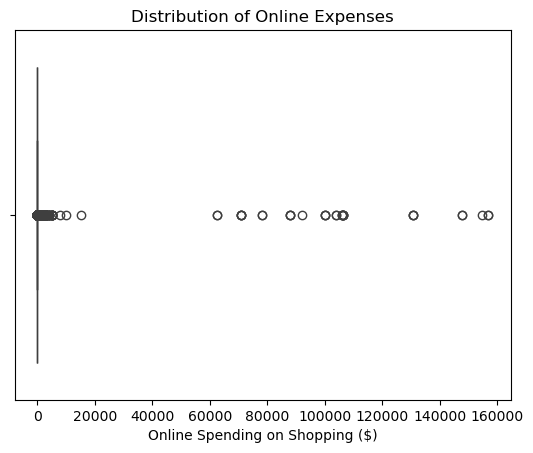

In [362]:
sns.boxplot(data=df, x="online_expense")

plt.title("Distribution of Online Expenses")
plt.xlabel("Online Spending on Shopping ($)")
plt.show()

We also find that age within this dataset is relatievly uniformly distributed.

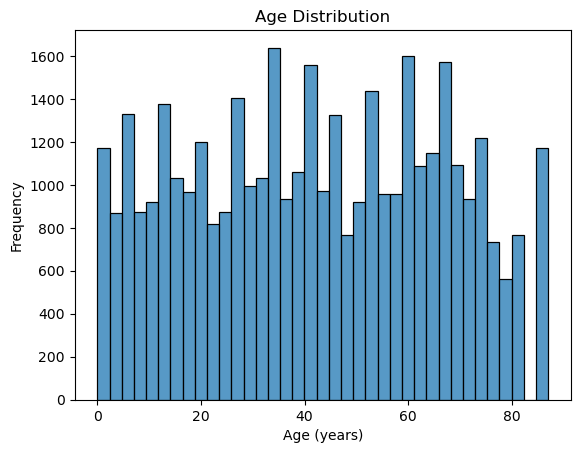

In [363]:
sns.histplot(data=df, x="age")

plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.show()

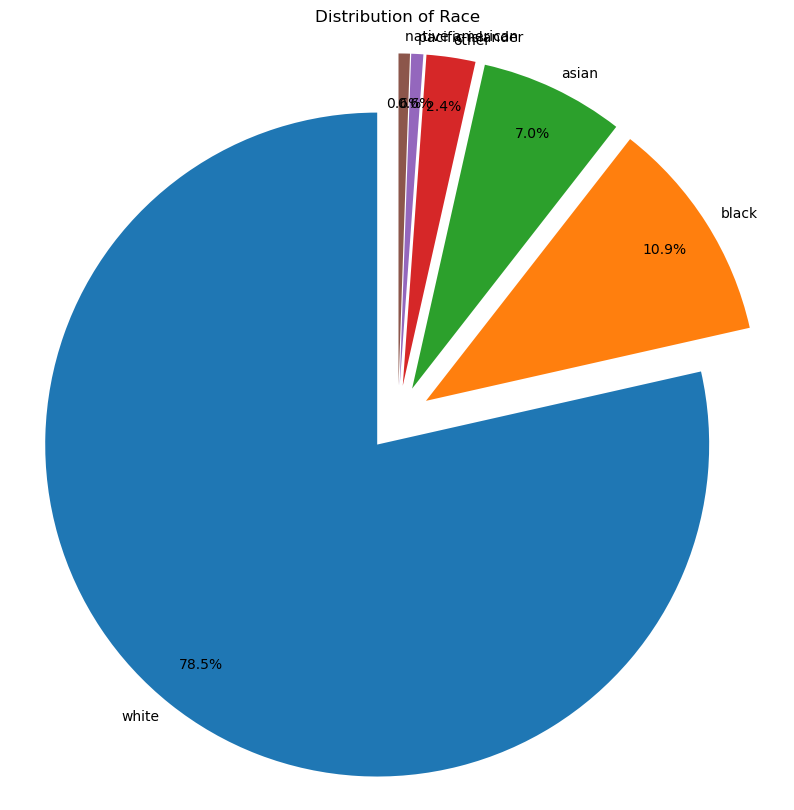

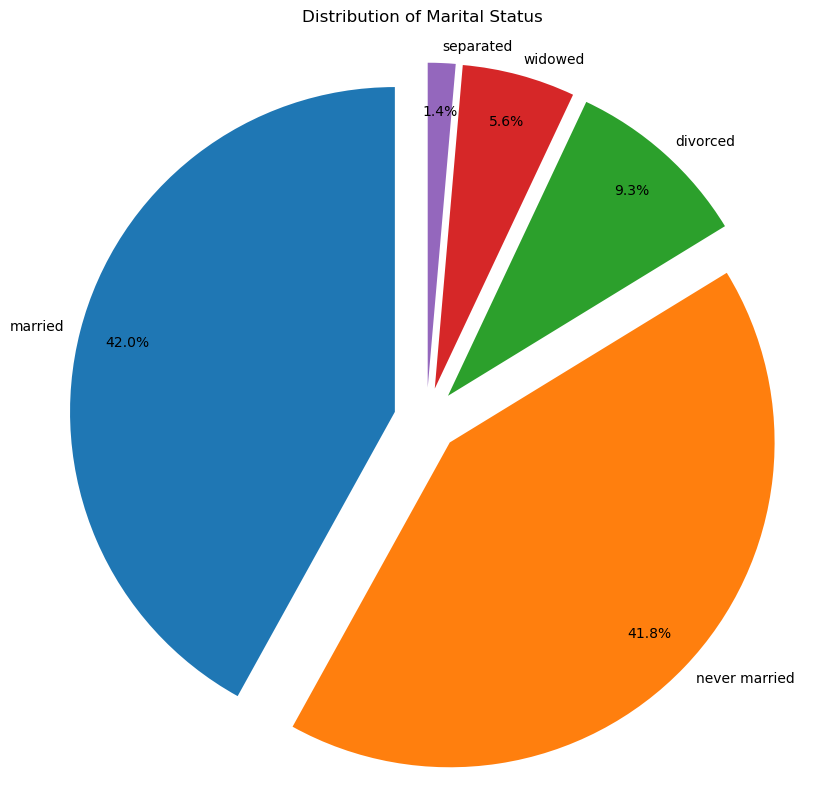

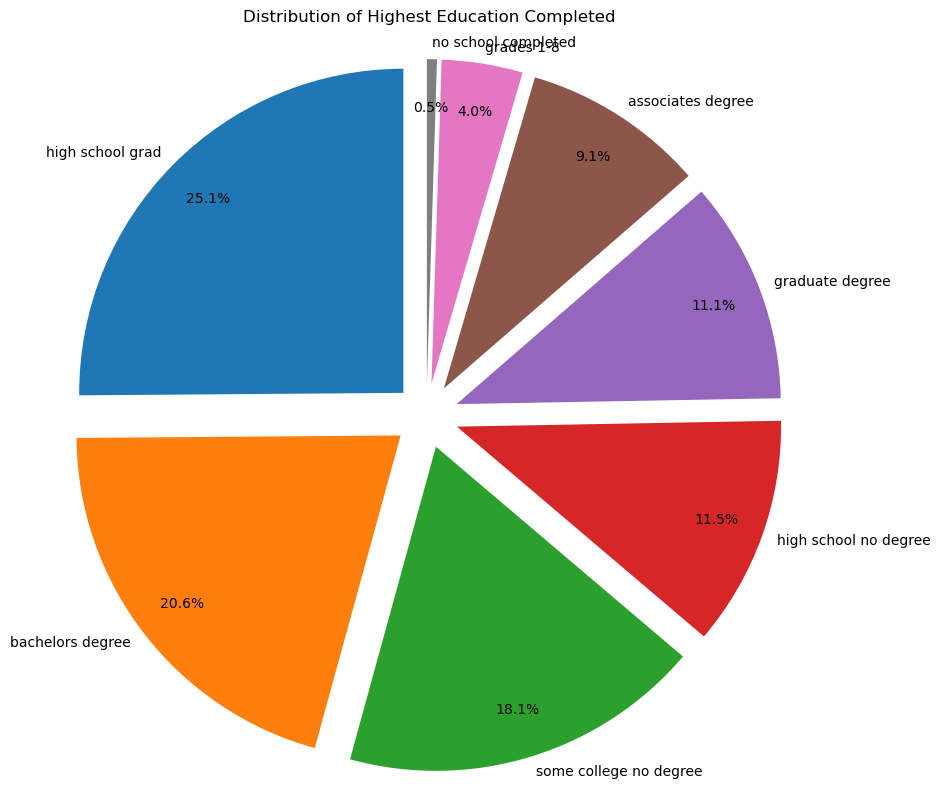

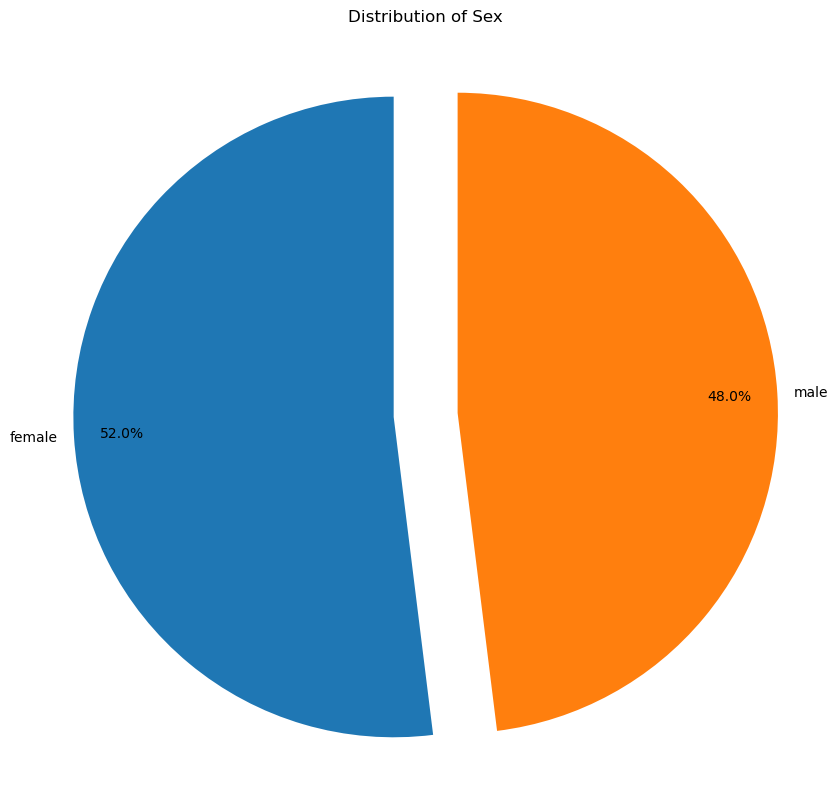

In [ ]:
# Function to plot a pie chart
def plot_pie_chart(df, column, title):
    # Count the occurrences of each category
    category_counts = df[column].value_counts()

    plt.figure(figsize=(10, 10))  
    plt.pie(
        category_counts, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        labeldistance=1.05,  # Move labels away from the center
        pctdistance=0.85,   # Move percentages closer to the center
        explode=[0.1] * len(category_counts),  # Slightly explode each slice
     
    )
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
    plt.show()

# Plot pie charts for 'race', 'marital_status', 'highest_ed_completed' and 'sex'
plot_pie_chart(df, 'race', 'Distribution of Race')
plot_pie_chart(df, 'marital_status', 'Distribution of Marital Status')
plot_pie_chart(df, 'highest_ed_completed', 'Distribution of Highest Education Completed')
plot_pie_chart(df, 'sex', 'Distribution of Sex')


From the above pie charts, we see the distribution of categorical variables race, education, sex and marital status. It's important to note that we have a relatively even distribution of male to female; females only being slightly more in the dataset.

## Bivariate and Multivariate Analysis

Now I would to analyze the income distribution by these categorical variables and whether or not they shopped online. From the side by side boxplots below, we see that in every subcategory that those who shopped online in 2023 tended to have a higher income.

Specifically regarding race, Asians earned the most while Native Americans earned the least. I would also like to point that there are a lot of income outliers in the White and Black individuals.

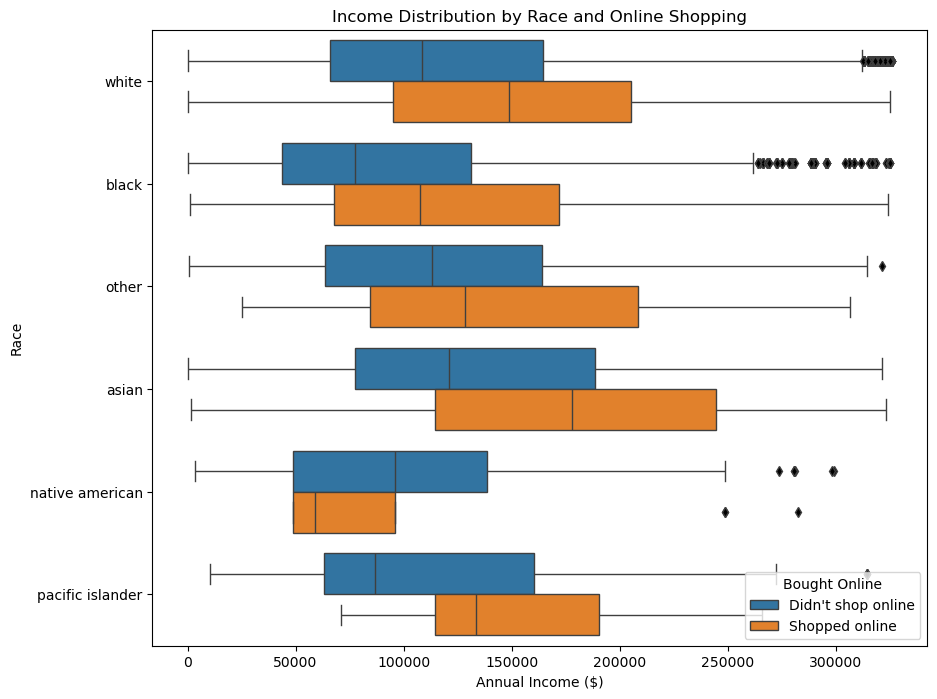

In [365]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = df, x = "total_income", y = "race", hue = "bought_online", flierprops=dict(marker='d',markerfacecolor='black',markersize = 5))
plt.title("Income Distribution by Race and Online Shopping")
plt.xlabel("Annual Income ($)")
plt.ylabel("Race")

legend = plt.legend(title='Bought Online', loc='lower right')
legend.texts[0].set_text("Didn't shop online")  
legend.texts[1].set_text("Shopped online")     
plt.show()

As expected, individuals with graduate degrees earned the most while those with no schooling completed earned the least.

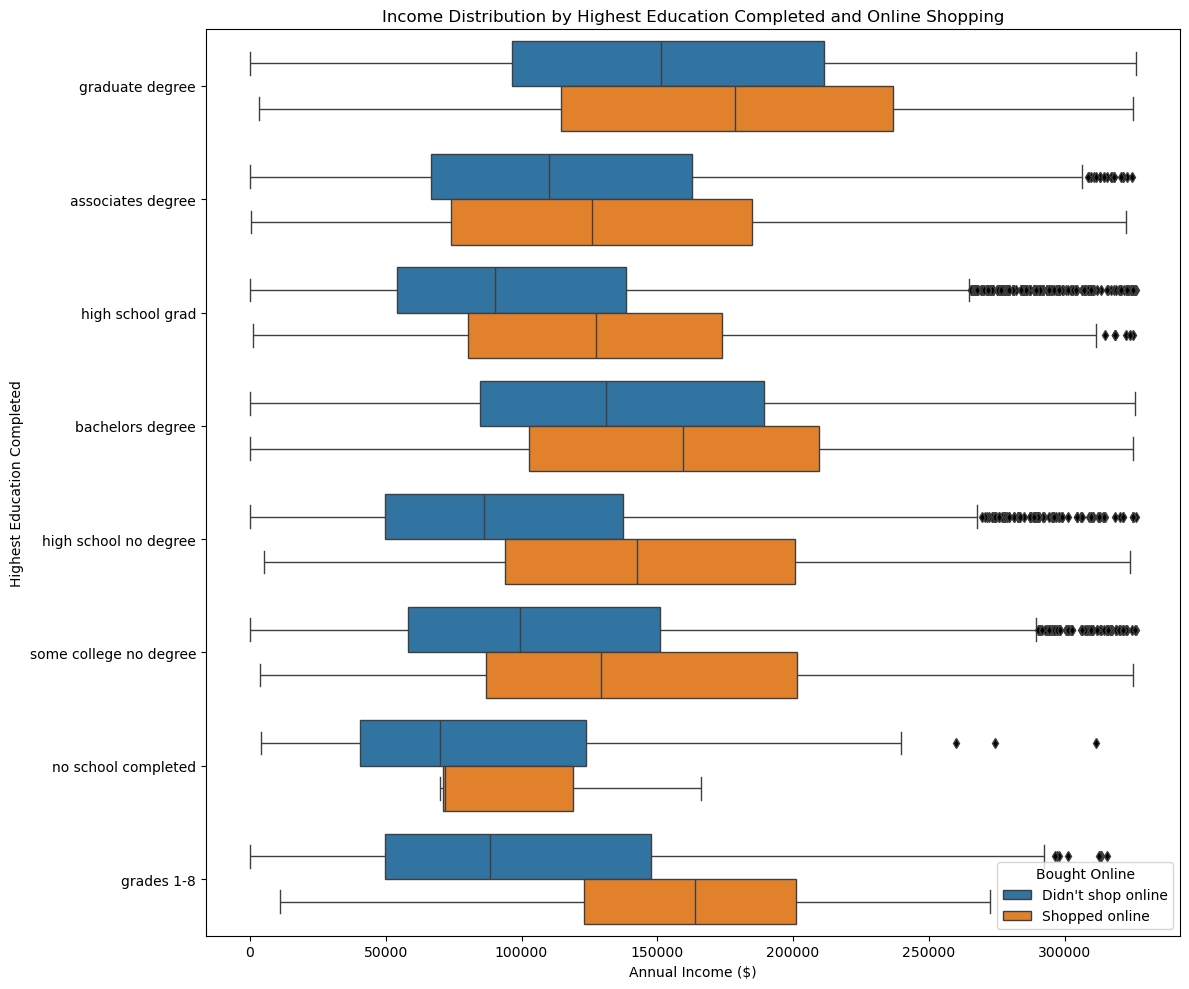

In [366]:
plt.figure(figsize=(12, 10))
ax = sns.boxplot(data = df, x = "total_income", y = "highest_ed_completed", hue = "bought_online", flierprops=dict(marker='d',markerfacecolor='black',markersize = 5))  
plt.title("Income Distribution by Highest Education Completed and Online Shopping")
plt.xlabel("Annual Income ($)")
plt.ylabel("Highest Education Completed")

legend = plt.legend(title='Bought Online', loc='lower right')
legend.texts[0].set_text("Didn't shop online")  
legend.texts[1].set_text("Shopped online")  
plt.tight_layout()
plt.show()

Not suprisingly, those who shop online tend to earn more. Males also tend to earn more than females.

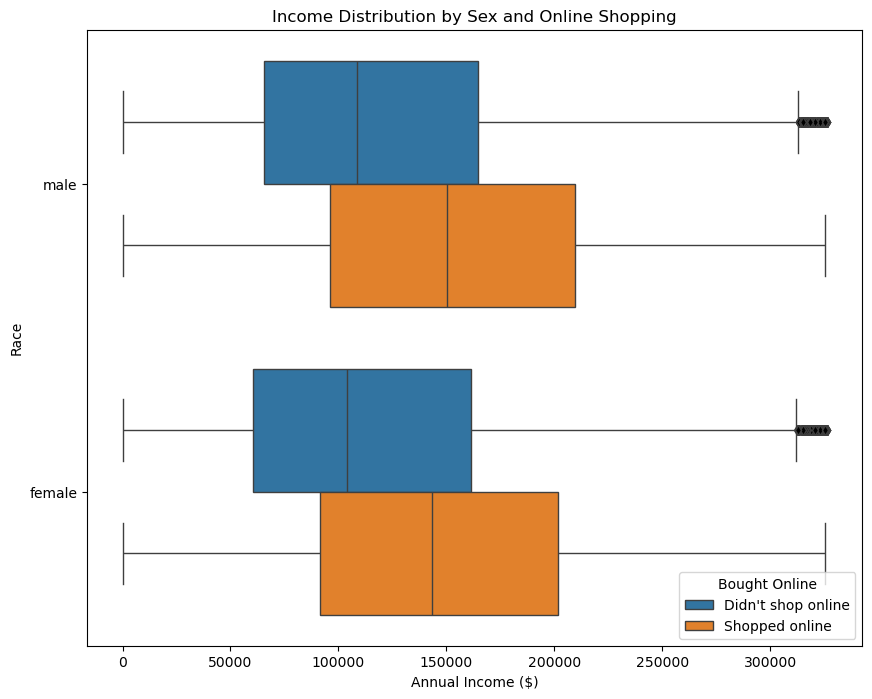

In [367]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = df, x = "total_income", y = "sex", hue = "bought_online", flierprops=dict(marker='d',markerfacecolor='black',markersize = 5))  
plt.title("Income Distribution by Sex and Online Shopping")
plt.xlabel("Annual Income ($)")
plt.ylabel("Race")
legend = plt.legend(title='Bought Online', loc='lower right')
legend.texts[0].set_text("Didn't shop online")  
legend.texts[1].set_text("Shopped online")  
plt.show()

Next I examine the linear relationships between income and online spending, income and expense, expense and online spending.

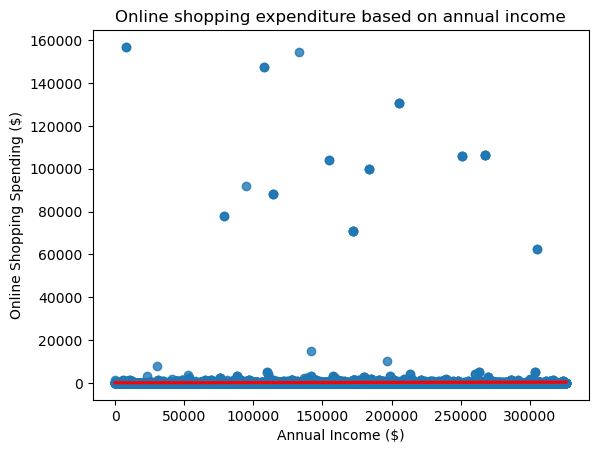

In [368]:
sns.regplot(data=df, x='total_income',y='online_expense', line_kws={"color": "red"})
plt.title("Online shopping expenditure based on annual income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Online Shopping Spending ($)")
plt.show()

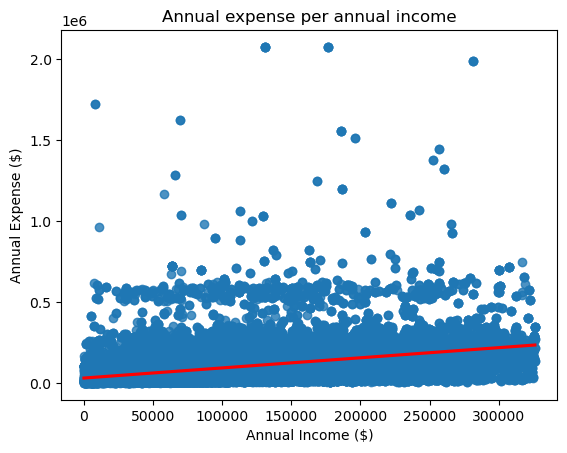

In [369]:
sns.regplot(data=df, x='total_income',y='total_expense', line_kws={"color": "red"})
plt.title("Annual expense per annual income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Annual Expense ($)")
plt.show()

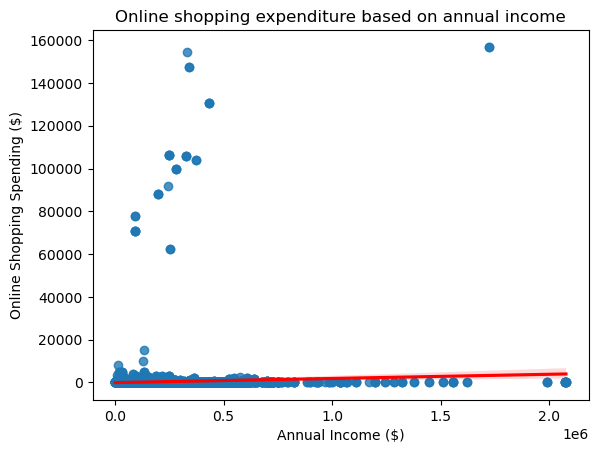

In [370]:
sns.regplot(data=df, x='total_expense',y='online_expense', line_kws={"color": "red"})
plt.title("Online shopping expenditure based on annual income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Online Shopping Spending ($)")
plt.show()

I also wanted to explore the relationship between age and online shopping expenditure. There doesn't seem to be a clear linear relationship between the variables. 

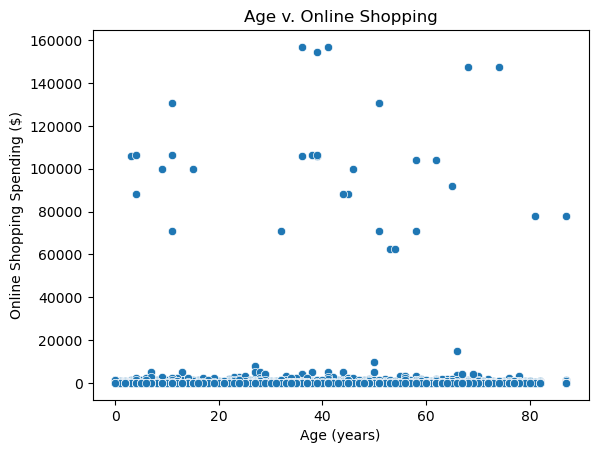

In [371]:
sns.scatterplot(data=df, x='age', y ='online_expense')
plt.title("Age v. Online Shopping")
plt.xlabel("Age (years)")
plt.ylabel("Online Shopping Spending ($)")
plt.show()

### Crosstabulations
After seeing that online shoppers earn more than their counterparts, let's run some cross-tabulations and visualize them to see if online spending is high or low for any particular demographic within race, earning type or marital status.

In [372]:
crosstab1 = pd.crosstab(df['bought_online'], df['race'])
# Calculate the ratio of the 2nd row's values over the 1st
percent_row = crosstab1.iloc[1] / crosstab1.iloc[0]

# Add a new row to the crosstab
crosstab1.loc['% Online Shop'] = percent_row

print(crosstab1)

race                 asian        black  native american       other  \
bought_online                                                          
0              2549.000000  4083.000000       199.000000  851.000000   
1               208.000000   206.000000        18.000000   83.000000   
% Online Shop     0.081601     0.050453         0.090452    0.097532   

race           pacific islander         white  
bought_online                                  
0                    206.000000  28656.000000  
1                     24.000000   2174.000000  
% Online Shop          0.116505      0.075865  


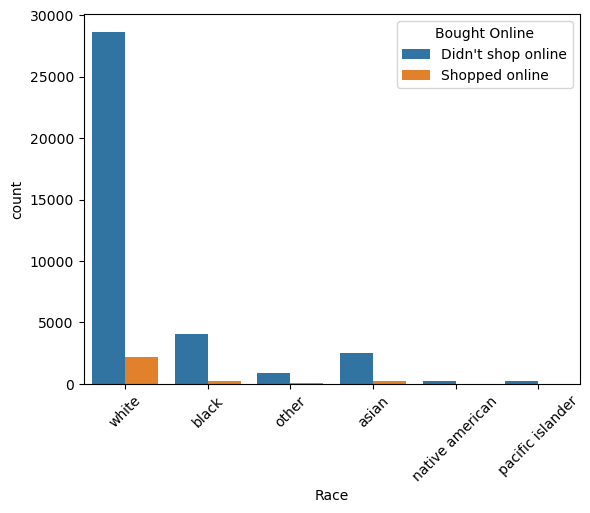

In [373]:
sns.countplot(data=df, x="race", hue="bought_online")
plt.xticks(rotation=45)
legend = plt.legend(title='Bought Online', loc='upper right')
legend.texts[0].set_text("Didn't shop online")  
legend.texts[1].set_text("Shopped online") 
plt.xlabel("Race")
plt.show()

In [374]:
crosstab2 = pd.crosstab(df['bought_online'], df['earning_type'])
# Calculate the ratio of the 2nd row's values over the 1st
percent_row = crosstab2.iloc[1] / crosstab2.iloc[0]

# Add a new row to the crosstab
crosstab2.loc['% Online Shop'] = percent_row
print(crosstab2)

earning_type   full-time 1 year  full-time part year  part-time 1 year  \
bought_online                                                            
0                  11922.000000          3057.000000       2071.000000   
1                    957.000000           260.000000        135.000000   
% Online Shop          0.080272             0.085051          0.065186   

earning_type   part-time part year  
bought_online                       
0                      2056.000000  
1                       172.000000  
% Online Shop             0.083658  


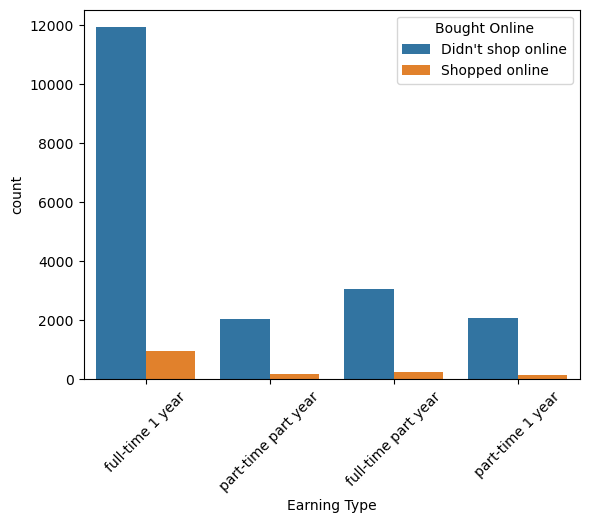

In [375]:
sns.countplot(data=df, x="earning_type", hue="bought_online")
plt.xticks(rotation=45)
legend = plt.legend(title='Bought Online', loc='upper right')
legend.texts[0].set_text("Didn't shop online")  
legend.texts[1].set_text("Shopped online") 
plt.xlabel("Earning Type")
plt.show()

In [376]:
crosstab3 = pd.crosstab(df['bought_online'], df['marital_status'])
# Calculate the ratio of the 2nd row's values over the 1st
percent_row = crosstab3.iloc[1] / crosstab3.iloc[0]

# Add a new row to the crosstab
crosstab3.loc['% Online Shop'] = percent_row
print(crosstab3)

marital_status     divorced       married  never married   separated  \
bought_online                                                          
0               3427.000000  15226.000000   15253.000000  513.000000   
1                206.000000   1246.000000    1151.000000   27.000000   
% Online Shop      0.060111      0.081834       0.075461    0.052632   

marital_status      widowed  
bought_online                
0               2125.000000  
1                 83.000000  
% Online Shop      0.039059  


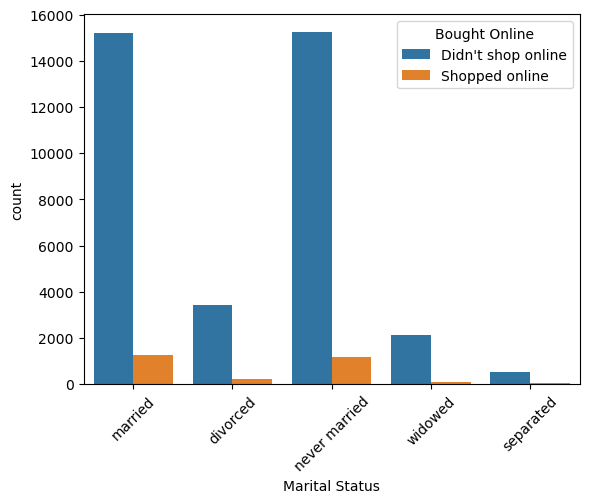

In [377]:
sns.countplot(data=df, x="marital_status", hue="bought_online")
plt.xticks(rotation=45)
legend = plt.legend(title='Bought Online', loc='upper right')
legend.texts[0].set_text("Didn't shop online")  
legend.texts[1].set_text("Shopped online") 
plt.xlabel("Marital Status")
plt.show()

### Correlation Analysis
Correlation matrix below illustrates that there are not any strong correlation between the numerical variables.

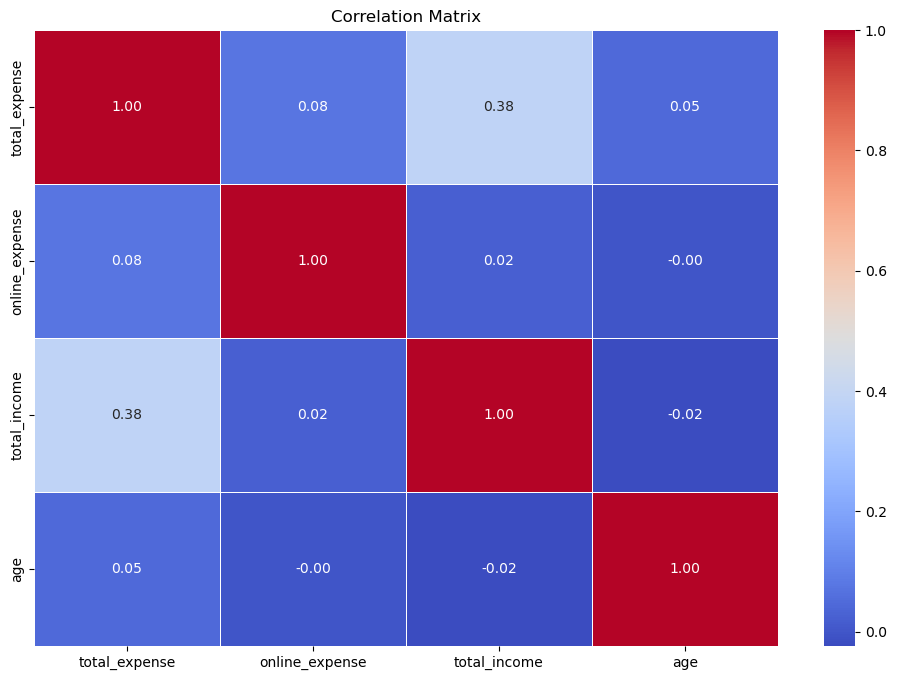

In [382]:
# Calculate the correlation matrix for numerical features
df_with_numerical_col = df[['total_expense', 'online_expense', 'total_income', 'age']]
correlation_matrix = df_with_numerical_col.corr()

plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


### Statistical Testing

I want to run some statistical tests to examine the relationships between certain variables of interest.

1. Chi-Square Test of Independence

First, as the p-values for all of the Chi-Square tests are less than 0.05, we can reject the null hypothesis and conclude that there is an association between the binary variable, 'bought_online' and each of the following variables: race, education and marital status. 

In [ ]:
# Chi-Square Test of Independence: Race and Bought Online
# Null Hypothesis: There is no association between race and whether or not the indvidual shopped online.
# Alternative Hypothesis: There is an association between race and whether or not the indvidual shopped online

contingency_table = pd.crosstab(df['race'], df['bought_online'])
chi2_stat, p_value_chi, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test:")
print(f"Chi2 Statistic: {chi2_stat}, p-value: {p_value_chi}, Degrees of Freedom: {dof}")


Chi-Square Test:
Chi2 Statistic: 43.043733399922836, p-value: 3.620420022082849e-08, Degrees of Freedom: 5


In [ ]:
# Chi-Square Test of Independence: Education and Bought Online
# Null Hypothesis: There is no association between education level and whether or not the indvidual shopped online.
# Alternative Hypothesis: There is an association between education level and whether or not the indvidual shopped online

contingency_table = pd.crosstab(df['highest_ed_completed'], df['bought_online'])
chi2_stat, p_value_chi, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test:")
print(f"Chi2 Statistic: {chi2_stat}, p-value: {p_value_chi}, Degrees of Freedom: {dof}")


Chi-Square Test:
Chi2 Statistic: 337.4744833199095, p-value: 5.90530068954855e-69, Degrees of Freedom: 7


In [ ]:
# Chi-Square Test of Independence: Marital status and Bought Online
# Null Hypothesis: There is no association between marital status and whether or not the indvidual shopped online.
# Alternative Hypothesis: There is an association between marital status and whether or not the indvidual shopped online

contingency_table = pd.crosstab(df['marital_status'], df['bought_online'])
chi2_stat, p_value_chi, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test:")
print(f"Chi2 Statistic: {chi2_stat}, p-value: {p_value_chi}, Degrees of Freedom: {dof}")


Chi-Square Test:
Chi2 Statistic: 57.07065394444142, p-value: 1.1956573550889547e-11, Degrees of Freedom: 4


2. T-Tests
   
From the t-tests, given the p-values < 0.05, we are able to conclude that 
- the mean annual income of those who shopped online were greater than those who did not, and 
- the mean annual expenses of those who shopped online were larger than those who did not.

In [ ]:
# T-Test (Total Income and Bought Online)
# Null Hypothesis: No difference in the mean annual income of those who shopped online vs. those who did not. 
# Alternative Hypothesis: The mean annual income of those who shopped online is greater than those who did not.

# Grouping data by 'bought_online'
group1_income = df[df['bought_online'] == True]['total_income']  # Bought online
group2_income = df[df['bought_online'] == False]['total_income']  # Did not buy online

# Perform two-tailed t-test
t_stat_income, p_value_two_tailed = ttest_ind(group1_income, group2_income, equal_var=False)

# Convert two-tailed p-value to one-tailed p-value (greater than)
if t_stat_income > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

print("One-Tailed T-Test (Alternative: Mean of 'bought_online' > Mean of 'not_bought_online'):")
print(f"T-Statistic: {t_stat_income}, One-Tailed p-value: {p_value_one_tailed}")



One-Tailed T-Test (Alternative: Mean of 'bought_online' > Mean of 'not_bought_online'):
T-Statistic: 23.154942043819386, One-Tailed p-value: 8.892039002324975e-110


In [409]:
# T-Test (Total Expenses and Bought Online)
# Null Hypothesis: No difference in the mean annual expenses of those who shopped online vs. those who did not. 
# Alternative Hypothesis: The mean annual expenses of those who shopped online is greater than those who did not.

# Grouping data by 'bought_online'
group1_expense = df[df['bought_online'] == True]['total_expense']  # Bought online
group2_expense = df[df['bought_online'] == False]['total_expense']  # Did not buy online

# Perform two-tailed t-test
t_stat_expense, p_value_two_tailed = ttest_ind(group1_expense, group2_expense, equal_var=False)

# Convert two-tailed p-value to one-tailed p-value (greater than)
if t_stat_expense > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

print("One-Tailed T-Test (Alternative: Mean of 'bought_online' > Mean of 'not_bought_online'):")
print(f"T-Statistic: {t_stat_income}, One-Tailed p-value: {p_value_one_tailed}")



One-Tailed T-Test (Alternative: Mean of 'bought_online' > Mean of 'not_bought_online'):
T-Statistic: 23.154942043819386, One-Tailed p-value: 1.4245176634140471e-36


3. ANOVA tests
We were interested in finding out if the mean online shopping expenditure were different across marital status and race categories.

- Marital Status and Online Expense: With a p-value < 0.05, we were able to reject the null hypothesis and conclude that there was a significant different between the mean online shopping expense across marital status groups. To further investigate, I conducted a Tukey HSD test but I was unable to find any two groups that had a meaningful difference in average online expenditure. 
- Race Status and Online Expense: Like mwith marital status,, we were able to reject the null hypothesis and conclude that there was a significant different between the mean online shopping expense across races. The Tukey HSD test did reveal some differences that were meaningful. The results revealed that the mean online expenditure for Asians were greater than Black, White and Other race individuals.


ANOVA for Marital Status and Online Expense:
F-Statistic: 2.3883679367356963, p-value: 0.04867853533909225
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------
     divorced       married   68.3557 0.7443  -85.4641 222.1755  False
     divorced never married  -16.2251 0.9985 -170.1024 137.6523  False
     divorced     separated  -83.3327  0.977  -470.377 303.7115  False
     divorced       widowed  -83.7491 0.8514 -310.2017 142.7035  False
      married never married  -84.5808 0.0923 -177.1481   7.9865  False
      married     separated -151.6885  0.792 -518.6949  215.318  False
      married       widowed -152.1048 0.1866 -342.2922  38.0826  False
never married     separated  -67.1077 0.9875 -434.1383 299.9229  False
never married       widowed   -67.524 0.8695  -257.758   122.71  False
    separated       widowed   -0.4164   

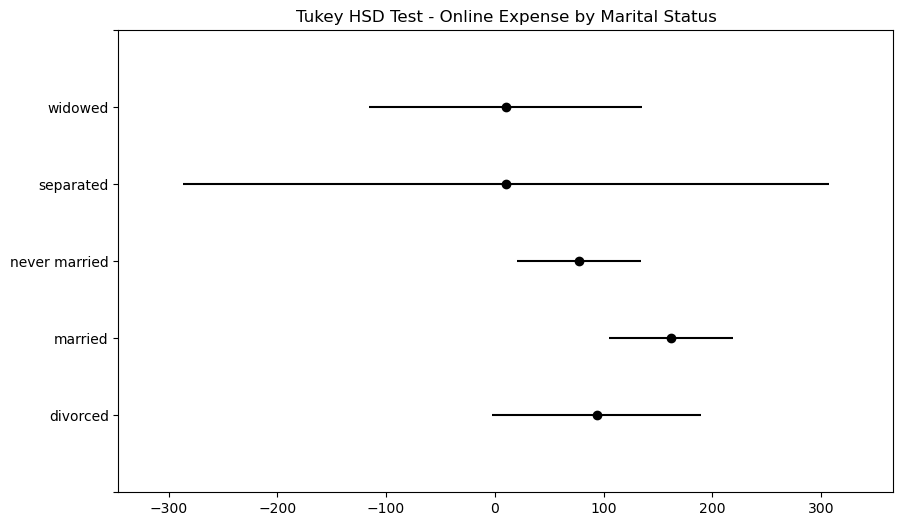

In [425]:
# ANOVA (Marital Status and Online Expense)
# Null hypothesis: No significant difference between the mean online shopping expenses across marital statuses.
# Alternative hypothesis: There is a significant difference between the mean online shopping expenses across marital statuses.
groups = [df[df['marital_status'] == level]['online_expense'] for level in df['marital_status'].unique()]
f_stat, p_value_anova = f_oneway(*groups)
print("\nANOVA for Marital Status and Online Expense:")
print(f"F-Statistic: {f_stat}, p-value: {p_value_anova}")

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(
    endog=df['online_expense'],  # Dependent variable
    groups=df['marital_status'],  # Independent categorical variable
    alpha=0.05  # Significance level
)

# Print the summary of Tukey's test
print(tukey)

# Visualize the results
tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD Test - Online Expense by Marital Status")
plt.show()



ANOVA for Race and Online Expense:
F-Statistic: 16.16596752158329, p-value: 5.847432439880441e-16
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1           group2       meandiff p-adj    lower      upper   reject
------------------------------------------------------------------------------
           asian            black -547.7055    0.0  -761.5241 -333.8869   True
           asian  native american -586.8279 0.0737 -1204.4072   30.7515  False
           asian            other -505.3403 0.0002   -836.968 -173.7127   True
           asian pacific islander -577.1827 0.0683 -1178.3645   23.9991  False
           asian            white -545.3321    0.0  -719.4531 -371.2112   True
           black  native american  -39.1224    1.0  -648.6006  570.3559  False
           black            other   42.3652  0.999  -273.9202  358.6505  False
           black pacific islander  -29.4772    1.0  -622.3339  563.3795  False
           black            whit

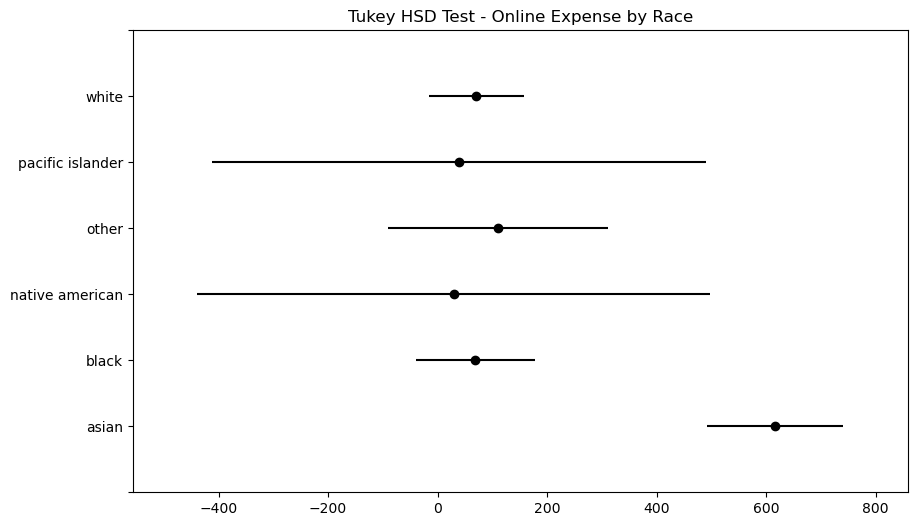

In [424]:
# ANOVA (Race and Online Expense)
# Null hypothesis: No significant difference between the mean online shopping expenses across race categories.
# Alternative hypothesis: There is a significant difference between the mean online shopping expenses across race categories.
groups = [df[df['race'] == level]['online_expense'] for level in df['race'].unique()]
f_stat, p_value_anova = f_oneway(*groups)
print("\nANOVA for Race and Online Expense:")
print(f"F-Statistic: {f_stat}, p-value: {p_value_anova}")

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(
    endog=df['online_expense'],  # Dependent variable
    groups=df['race'],  # Independent categorical variable
    alpha=0.05  # Significance level
)

# Print the summary of Tukey's test
print(tukey)

# Visualize the results
tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD Test - Online Expense by Race")
plt.show()


## Data Distribution and Normalization

As mentioned earlier, the income and expense data is skewed right. We proceed with a Box-Cox transformation since a log transformation is not adequate due to the heavily skewed data. 

In [394]:
from scipy.stats import boxcox

# Apply Box-Cox to total income and total expense and online_expense
df['boxcox_total_income'], income_lambda = boxcox(df['total_income'] + 1)  # Add 1 to avoid zero issues
df['boxcox_total_expense'], expense_lambda = boxcox(df['total_expense'] + 1)
df['boxcox_online_expense'], online_expense_lambda = boxcox(df['online_expense'] + 1)


The histograms show that the distribution of the annual income and expense have become much more normalized. In fact, the expense distribution is now bimodal.

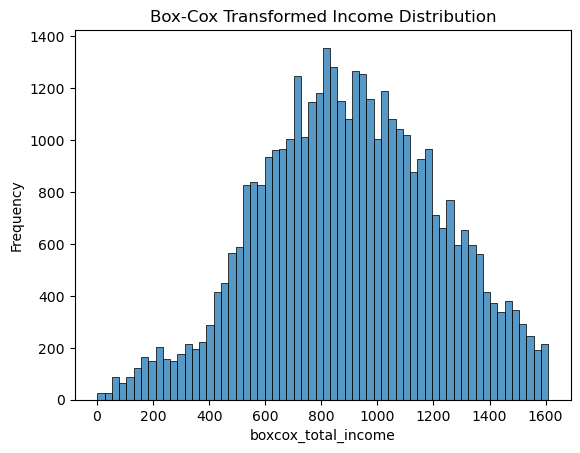

In [397]:
sns.histplot(data=df, x="boxcox_total_income")

plt.title("Box-Cox Transformed Income Distribution")
plt.ylabel("Frequency")
plt.show()

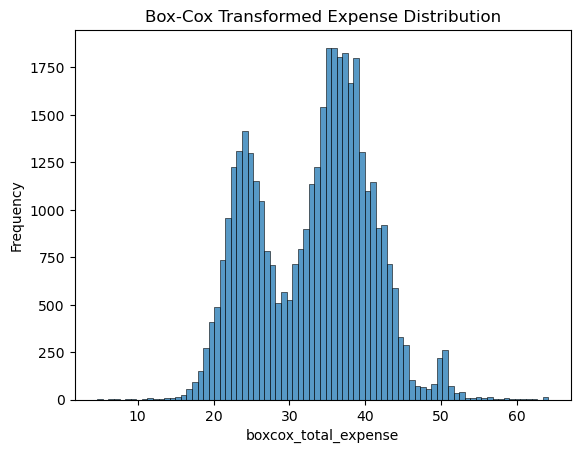

In [398]:
sns.histplot(data=df, x="boxcox_total_expense")

plt.title("Box-Cox Transformed Expense Distribution")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Export to csv
df.to_csv('../../data/processed-data/ces_clean_normalized.csv', index=False)

# Conclusion and Next Steps

## Summary of EDA Findings
Through the EDA process, we found that ...
* Regardless of any categorical variable, those who shopped online tended to have a higher annual income than those who did not. 
* There is no strong correlation between any of the numerical variables: income, expenses, online expenses, or age
* There is an association between whether or not one shops online and their race,education level and marital status.
* The mean annual income of those who shopped online were greater than those who did not. 
* The mean annual expenses of those who shopped online were larger than those who did not.
* There are a statistically significant difference between mean of online shopping expenditures across race categories. More specifically, Asians spent more than White, Black and Other race individuals. 